#EDA


In [ ]:
# !pip install ucimlrepo
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4b54ab076d80a1f559765f5776a499bb03435bb78e60901849db0431208fa164
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
#from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, brier_score_loss, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.utils import resample
from lime.lime_tabular import LimeTabularExplainer
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Load the data, and show the head
file_path = "/content/gdrive/My Drive/Dataset/wdbc.data"
# above .data file is comma delimited

wdbc = pd.read_csv(file_path, delimiter=",", header  = None )
names = ["ID", "Cancer Type", "Radius", "Texture", "Perimeter", "Area", "Smoothness", "Compactness", "Concavity", "Concave Points", "Symmetry", "Fractal Dimesions", "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points", "SE Symmetry", "SE Fractal Dimesions", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimesions"]
wdbc.columns = names

wdbc.head()

ID Cancer Type  Radius  Texture  Perimeter    Area  Smoothness  \
0    842302           M   17.99    10.38     122.80  1001.0     0.11840   
1    842517           M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903           M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301           M   11.42    20.38      77.58   386.1     0.14250   
4  84358402           M   20.29    14.34     135.10  1297.0     0.10030   

   Compactness  Concavity  Concave Points  ...  Worst Radius  Worst Texture  \
0      0.27760     0.3001         0.14710  ...         25.38          17.33   
1      0.07864     0.0869         0.07017  ...         24.99          23.41   
2      0.15990     0.1974         0.12790  ...         23.57          25.53   
3      0.28390     0.2414         0.10520  ...         14.91          26.50   
4      0.13280     0.1980         0.10430  ...         22.54          16.67   

   Worst Perimeter  Worst Area  Worst Smoothness  Worst Compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   Worst Concavity  Worst Concave Points  Worst Symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   Worst Fractal Dimesions  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 32 columns]

In [ ]:
#Note: can this be deleted?
'''
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

#Convert Pd dataframe
# bcwd = pd.DataFrame(data = breast_cancer_wisconsin_diagnostic.data, columns=breast_cancer_wisconsin_diagnostic.data.feature_names)
print(breast_cancer_wisconsin_diagnostic.data.items())

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)
'''

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

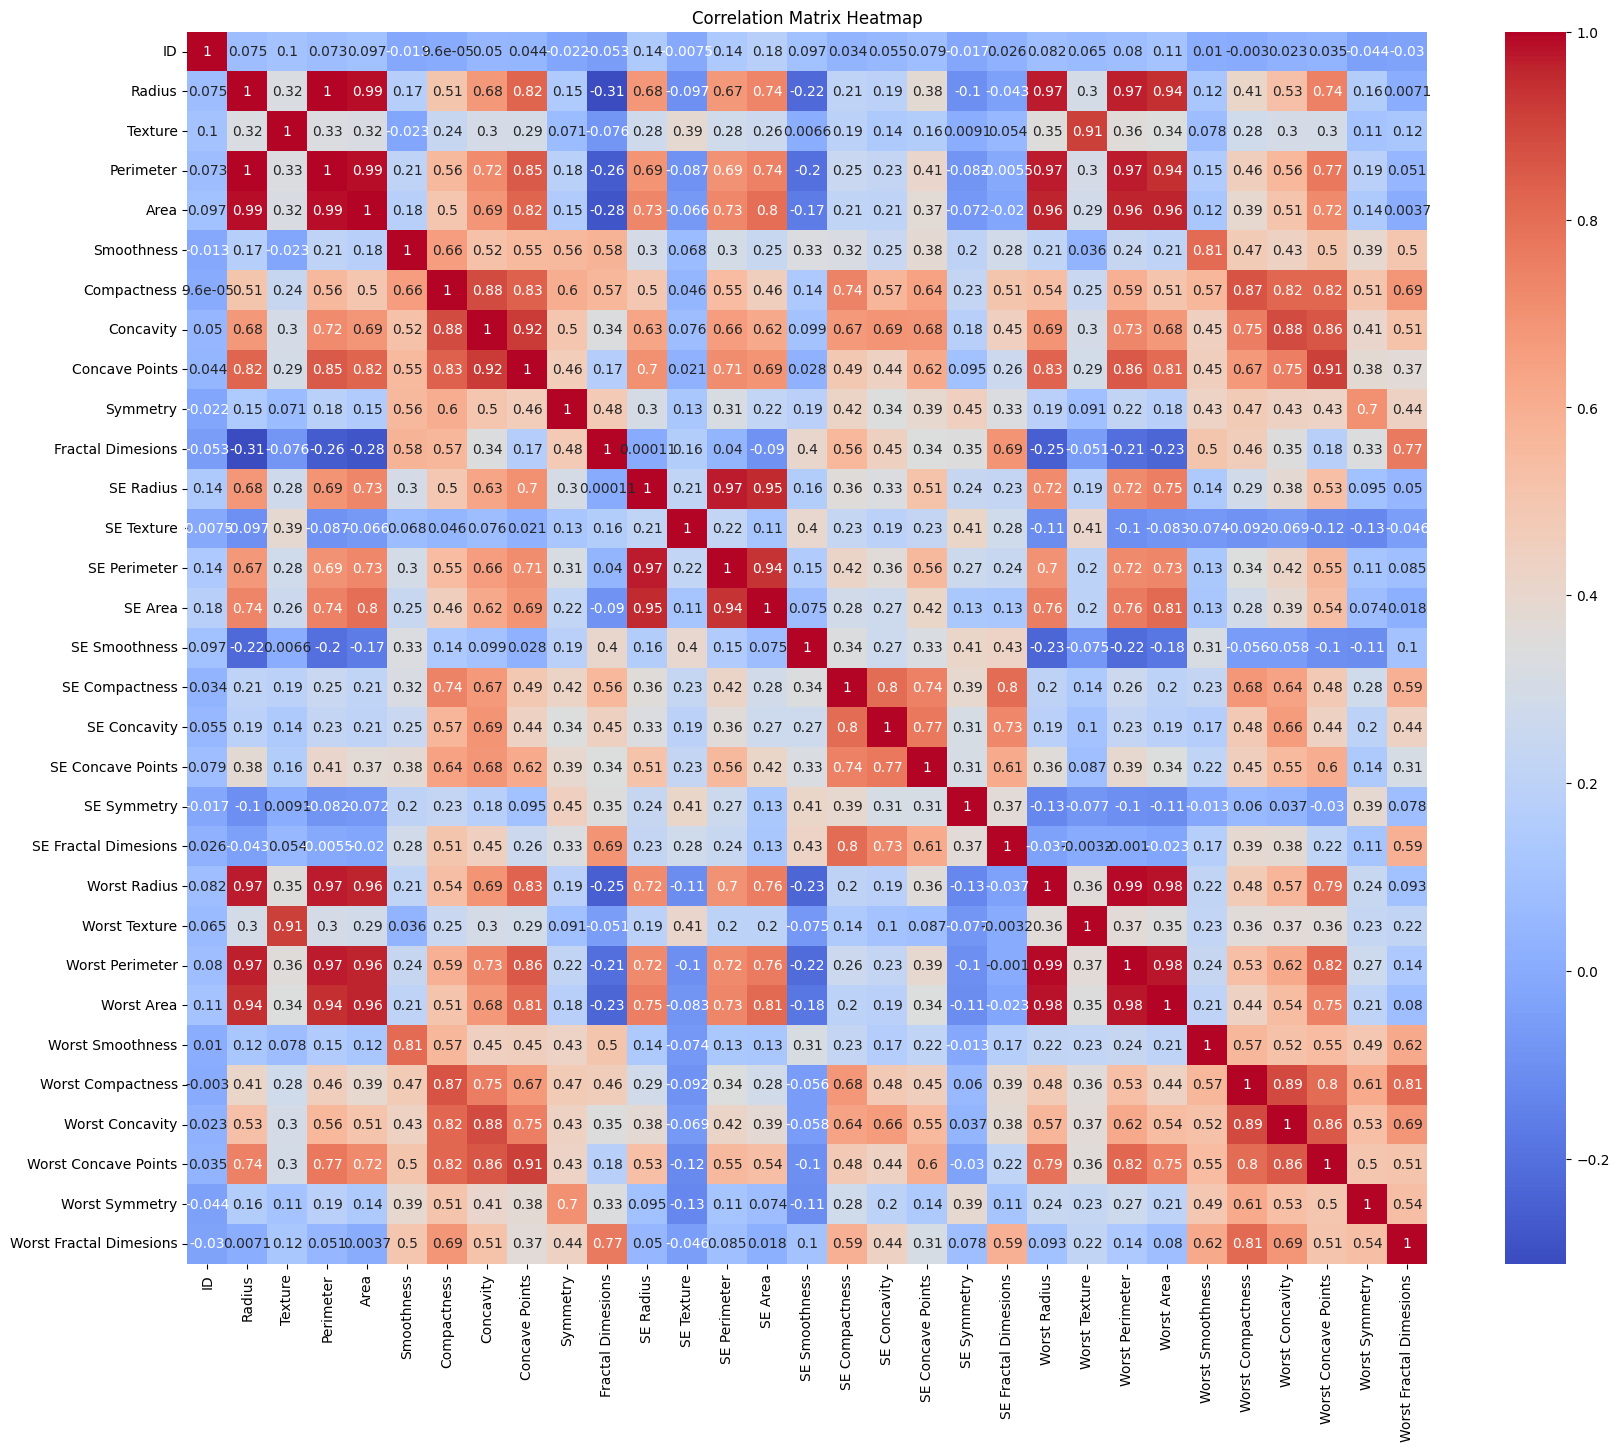

In [ ]:
#Show the correlation matrix of the data
correlation_matrix = wdbc.corr()

plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axes is being cleared.
To output multiple subplots, the figure containing the passed axe

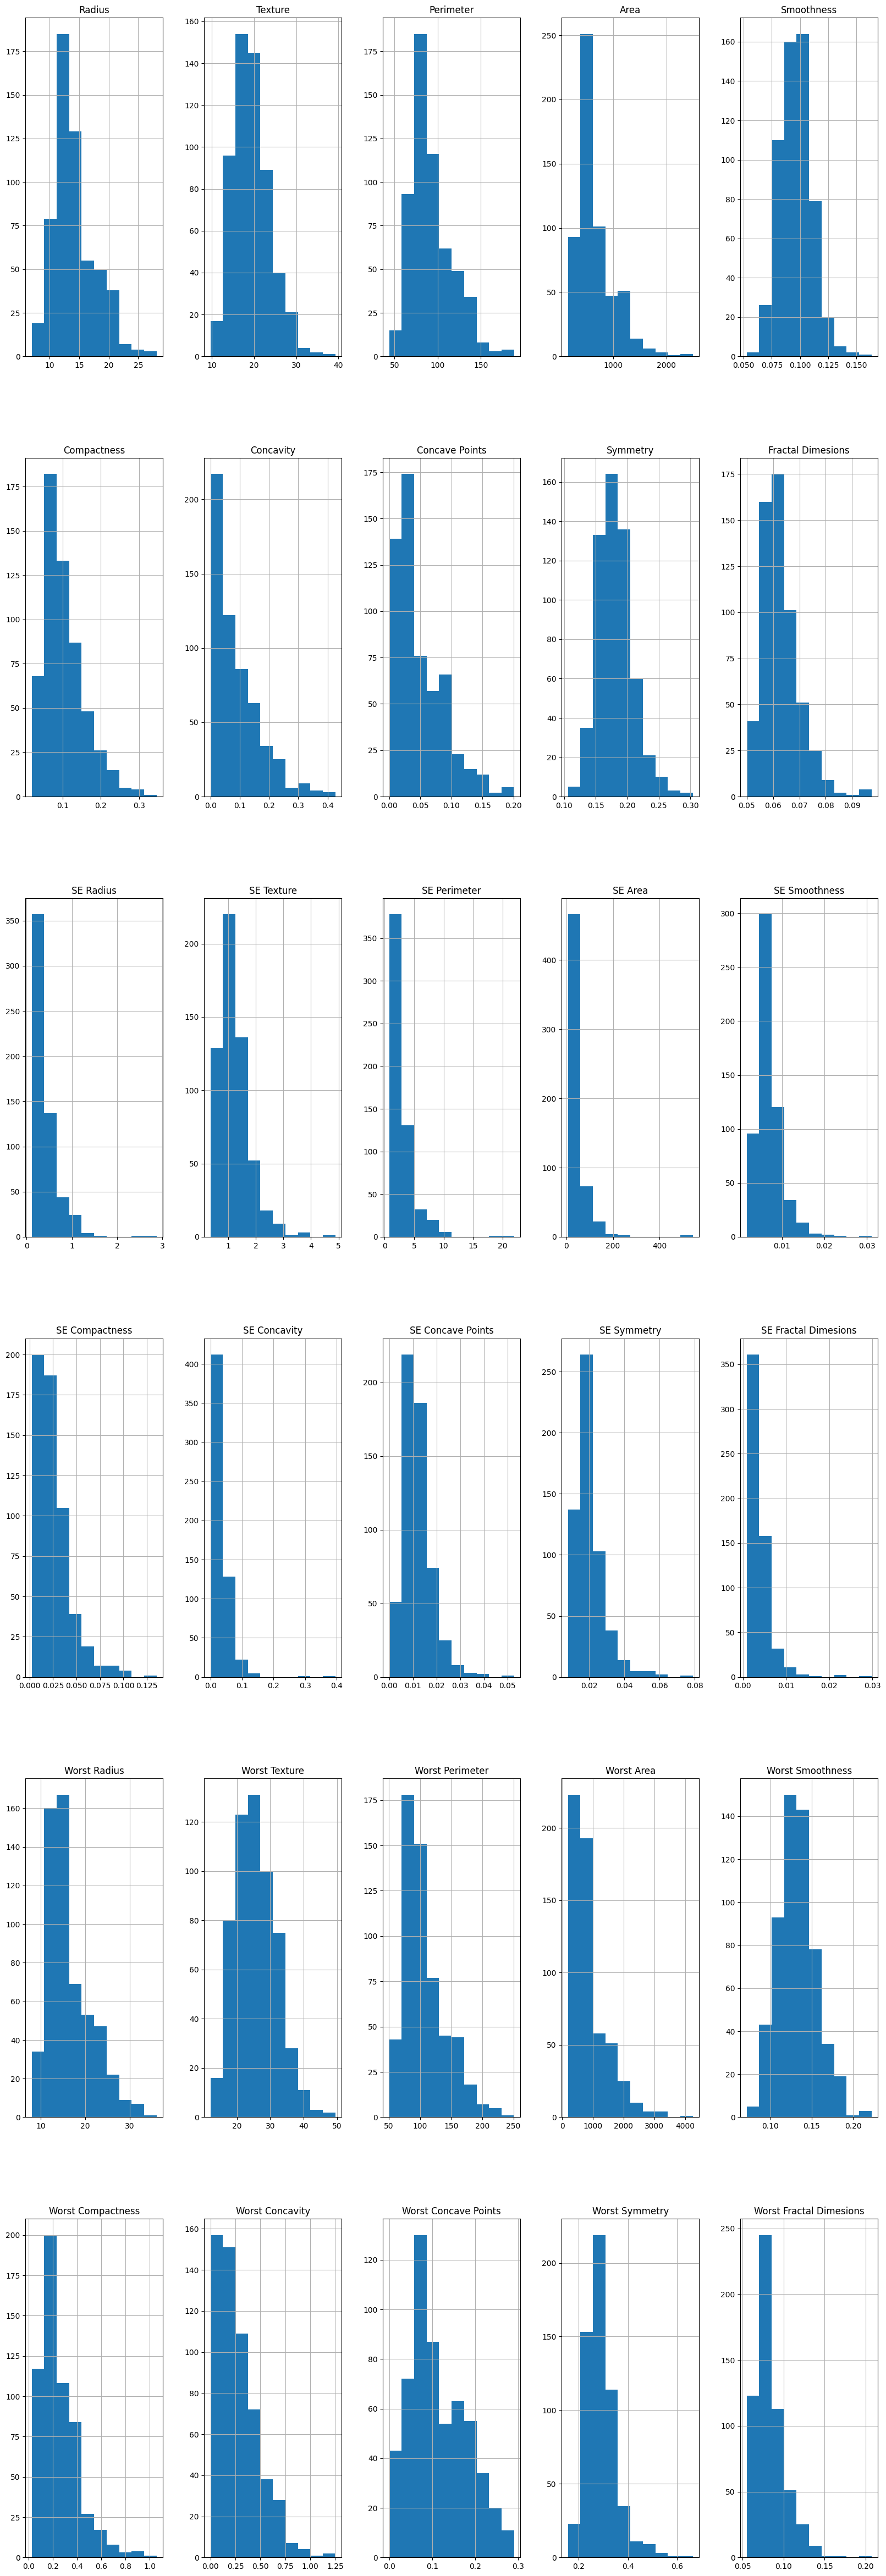

In [ ]:
#Print histograms, to analyze the normality of the features
featurelist =  ["Radius", "Texture", "Perimeter", "Area", "Smoothness", "Compactness", "Concavity", "Concave Points", "Symmetry", "Fractal Dimesions", "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points", "SE Symmetry", "SE Fractal Dimesions", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimesions"]

fig, axs = plt.subplots(10, 3, figsize = (20,60))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Histogram for Normality of Features", fontsize=18, y=0.95)

for features, ax in zip(featurelist, axs.ravel()):
  wdbc[featurelist].hist(ax=ax)
  ax.set_title(features.upper())


plt.show()


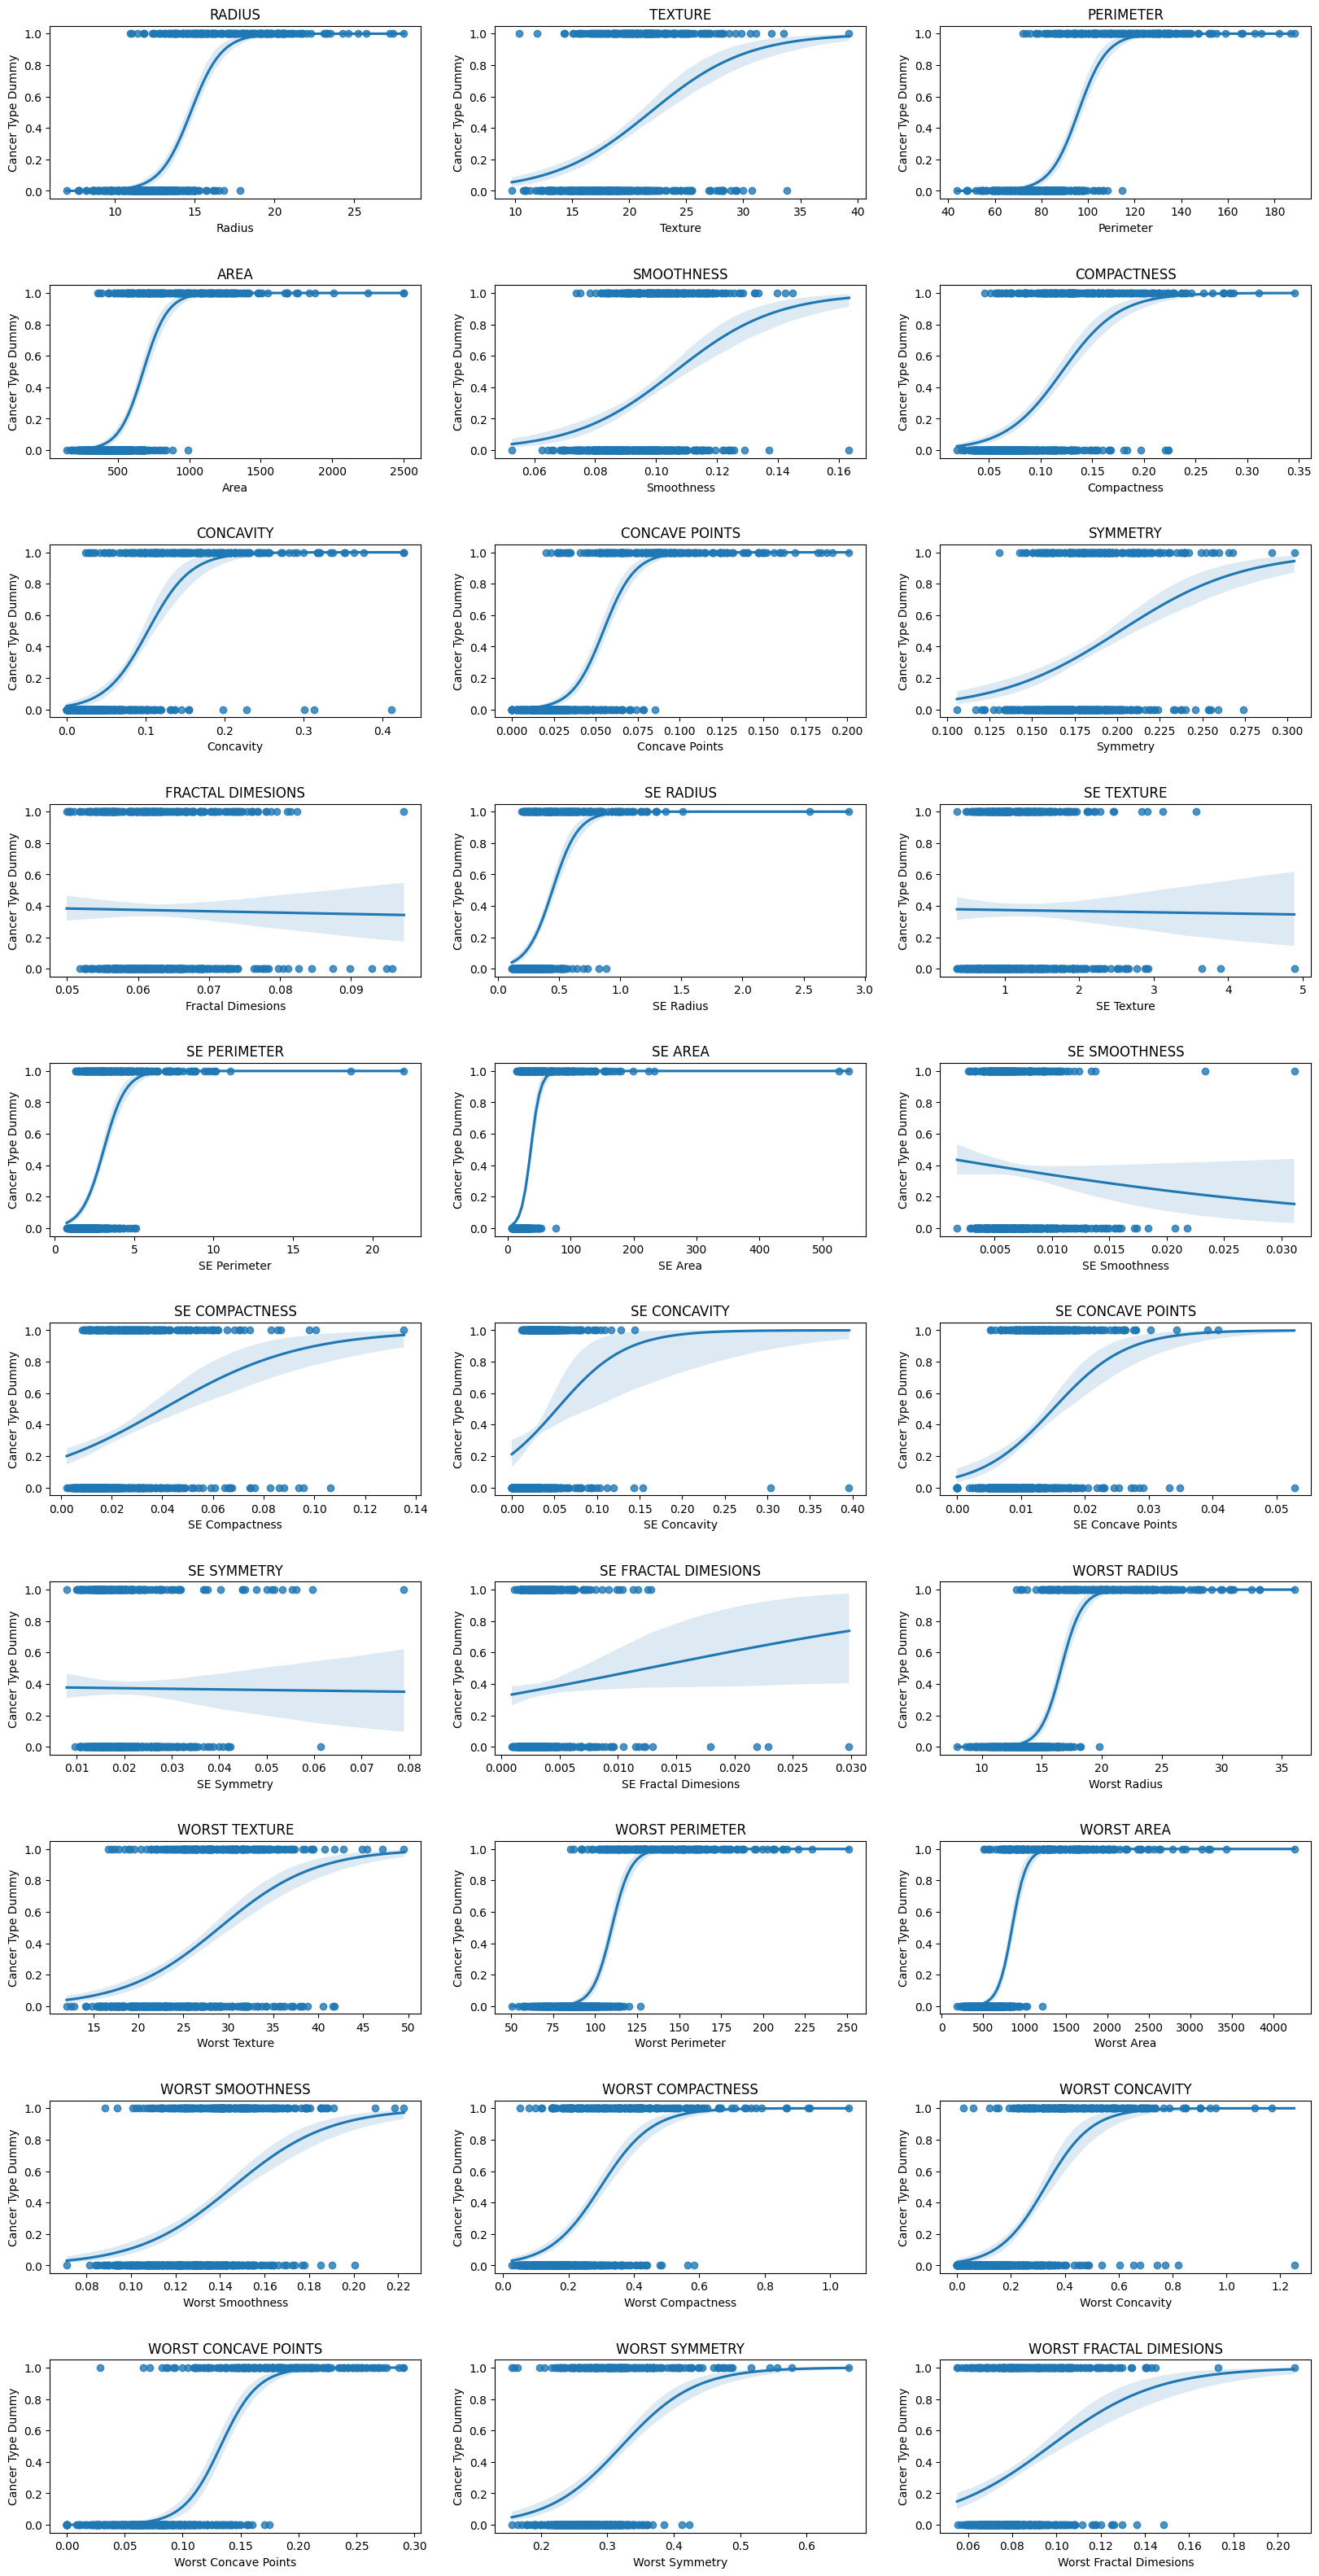

In [ ]:
#Analyze the linearity of each feature

wdbc["Cancer Type Dummy"] = wdbc["Cancer Type"]
wdbc["Cancer Type Dummy"] = wdbc['Cancer Type Dummy'].astype('category')
wdbc['Cancer Type Dummy'] = wdbc['Cancer Type Dummy'].cat.codes


fig, axs = plt.subplots(10, 3, figsize = (20,40))
plt.subplots_adjust(hspace=0.5)

for features, ax in zip(featurelist, axs.ravel()):
  sns.regplot(x= features, y= 'Cancer Type Dummy', data = wdbc, logistic= True, ax=ax)
  ax.set_title(features.upper())

plt.show()


Some features are highly correlated to each other. To remove these, we will use manual feature selection. We opted for this method to ensure the final model is still explainable; we can choose which metrics are the most understandable for the users. So, instead of Mean/SE/Worst of different features, we removed the Mean/SE/Worst values where they were highly correlated. Our threshold for 'high correlation' is 0.7

First, we want to find which features have this high correlation.

In [ ]:
correlations = correlation_matrix.abs()
s = correlations.unstack()
sorted = s.sort_values(kind="quicksort", ascending=False)

for i in range(0, len(sorted)):
  if sorted[i] == 1:
    n=i
  if sorted[i] > 0.7:
    x=i

corrdict = sorted[n+1:x].to_dict()

print(corrdict)

{('Perimeter', 'Radius'): 0.9978552814938109, ('Radius', 'Perimeter'): 0.9978552814938109, ('Worst Radius', 'Worst Perimeter'): 0.993707916102949, ('Worst Perimeter', 'Worst Radius'): 0.993707916102949, ('Radius', 'Area'): 0.9873571700566127, ('Area', 'Radius'): 0.9873571700566127, ('Perimeter', 'Area'): 0.9865068039913907, ('Area', 'Perimeter'): 0.9865068039913907, ('Worst Radius', 'Worst Area'): 0.9840145644590742, ('Worst Area', 'Worst Radius'): 0.9840145644590742, ('Worst Area', 'Worst Perimeter'): 0.9775780914063871, ('Worst Perimeter', 'Worst Area'): 0.9775780914063871, ('SE Radius', 'SE Perimeter'): 0.9727936770160764, ('SE Perimeter', 'SE Radius'): 0.9727936770160764, ('Worst Perimeter', 'Perimeter'): 0.9703868870426394, ('Perimeter', 'Worst Perimeter'): 0.9703868870426394, ('Worst Radius', 'Radius'): 0.9695389726112055, ('Radius', 'Worst Radius'): 0.9695389726112055, ('Perimeter', 'Worst Radius'): 0.9694763634663146, ('Worst Radius', 'Perimeter'): 0.9694763634663146, ('Radius'

As you can see, every second entry is the same as the entry before it. Therefore, we will remove the even entries.


In [ ]:
keys = list(corrdict.keys())
values = list(corrdict.values())

highest_correlation = {}

for i in range(0,len(corrdict)):
  if i % 2 != 0:
    highest_correlation[keys[i]]=values[i]
    print(keys[i])

('Radius', 'Perimeter')
('Worst Perimeter', 'Worst Radius')
('Area', 'Radius')
('Area', 'Perimeter')
('Worst Area', 'Worst Radius')
('Worst Perimeter', 'Worst Area')
('SE Perimeter', 'SE Radius')
('Perimeter', 'Worst Perimeter')
('Radius', 'Worst Radius')
('Worst Radius', 'Perimeter')
('Worst Perimeter', 'Radius')
('Area', 'Worst Radius')
('Area', 'Worst Area')
('Area', 'Worst Perimeter')
('SE Area', 'SE Radius')
('Worst Area', 'Perimeter')
('Radius', 'Worst Area')
('SE Area', 'SE Perimeter')
('Concavity', 'Concave Points')
('Worst Texture', 'Texture')
('Concave Points', 'Worst Concave Points')
('Worst Concavity', 'Worst Compactness')
('Worst Concavity', 'Concavity')
('Compactness', 'Concavity')
('Worst Compactness', 'Compactness')
('Concavity', 'Worst Concave Points')
('Worst Perimeter', 'Concave Points')
('Worst Concavity', 'Worst Concave Points')
('Concave Points', 'Perimeter')
('Compactness', 'Concave Points')
('Worst Radius', 'Concave Points')
('Concave Points', 'Area')
('Radius',

Now, we will go through these, and manually remove some of these features.

We decided to remove:

*   Perimeter and Radius (as well as their SE and worst values) since they are highly correlated with Area)
*   Worst area and SE area, as it is highly correlated with area
*   Concave points and Compactness (as well as their SE and worst values), as they is highly correlated with concavity
*   Worst smoothness, as it is highly correlated with smoothness
*   Worst texture, as it is highly correlated with texture
*   Worst fractal dimensions, as it is highly correlated with fractal dimensions
*   Worst concavity, as it is highly correlated with concavity

We left in the correlation between SE Concavity and SE Fractal Dimensions, as we felt removing one of these values might remove valuable nuance.

In [ ]:
selected_features = wdbc

remove_list = ["Radius", "SE Radius", "Worst Radius", "Perimeter", "SE Perimeter", "Worst Perimeter", "Worst Area", "SE Area", "Concave Points", "SE Concave Points", "Worst Concave Points", "Compactness", "SE Compactness", "Worst Compactness", "Worst Smoothness", "Worst Texture", "Worst Fractal Dimesions", "Worst Concavity"]

selected_features = selected_features.drop(remove_list, axis=1)

selected_features.head()

ID Cancer Type  Texture    Area  Smoothness  Concavity  Symmetry  \
0    842302           M    10.38  1001.0     0.11840     0.3001    0.2419   
1    842517           M    17.77  1326.0     0.08474     0.0869    0.1812   
2  84300903           M    21.25  1203.0     0.10960     0.1974    0.2069   
3  84348301           M    20.38   386.1     0.14250     0.2414    0.2597   
4  84358402           M    14.34  1297.0     0.10030     0.1980    0.1809   

   Fractal Dimesions  SE Texture  SE Smoothness  SE Concavity  SE Symmetry  \
0            0.07871      0.9053       0.006399       0.05373      0.03003   
1            0.05667      0.7339       0.005225       0.01860      0.01389   
2            0.05999      0.7869       0.006150       0.03832      0.02250   
3            0.09744      1.1560       0.009110       0.05661      0.05963   
4            0.05883      0.7813       0.011490       0.05688      0.01756   

   SE Fractal Dimesions  Worst Symmetry  Cancer Type Dummy  
0              0.006193          0.4601                  1  
1              0.003532          0.2750                  1  
2              0.004571          0.3613                  1  
3              0.009208          0.6638                  1  
4              0.005115          0.2364                  1

In [ ]:
#Check if multicollinearity has been removed
corr = selected_features.corr()
correlations = corr.abs()
s = correlations.unstack()
sorted = s.sort_values(kind="quicksort", ascending=False)

for i in range(0,len(sorted)):
  if sorted[i] == 1:
    n=i
  if sorted[i] > 0.7:
    x=i
c = sorted[n+1:x].to_dict()
print(c)

#Yes, all multicollinearity (besides SE Fractal Dimesions-SE Concavity) has been removed!

{('SE Concavity', 'SE Fractal Dimesions'): 0.727372183881192, ('SE Fractal Dimesions', 'SE Concavity'): 0.727372183881192, ('Area', 'Cancer Type Dummy'): 0.7089838365853902}


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


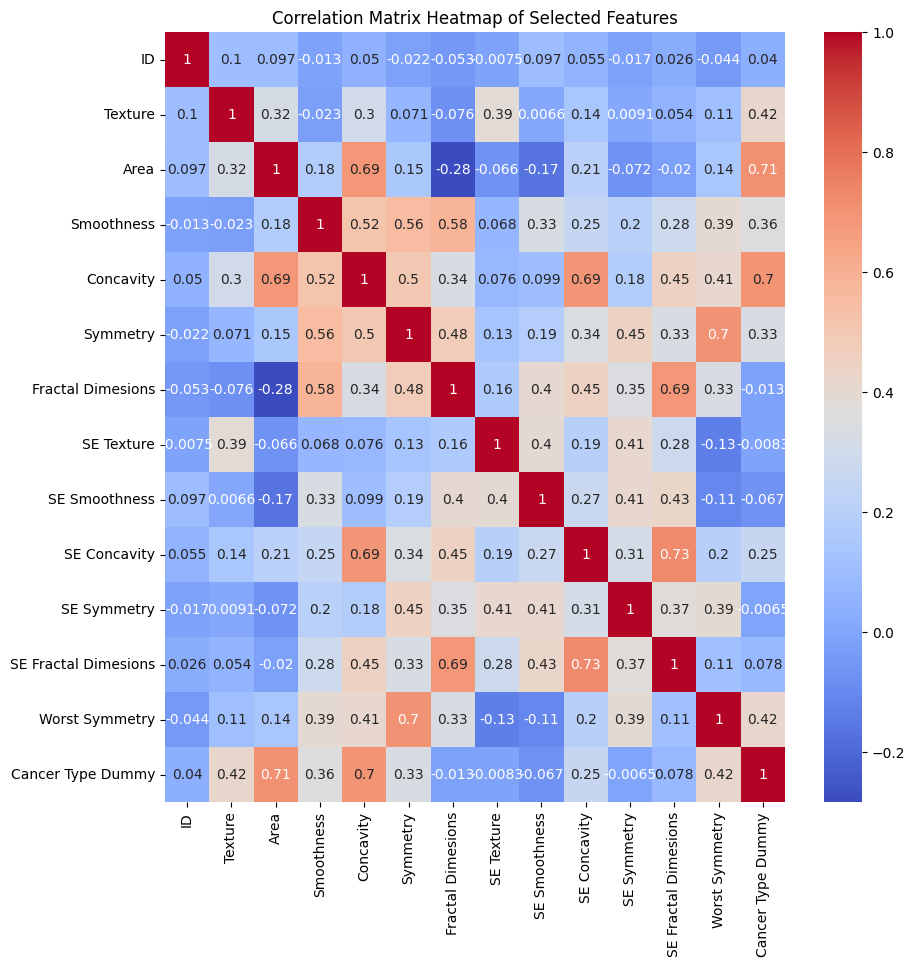

In [ ]:
#Plot the final correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

# Models

In [ ]:
#Define target and features
y = selected_features["Cancer Type"]
X = selected_features.drop(["ID", "Cancer Type","Cancer Type Dummy"], axis = 1)

In [ ]:
#NOTE: Can this be removed?

'''
sum_log_reg = 0
sum_dec_tree = 0
sum_svm = 0
sum_rand_for = 0
sum_sgd = 0
sum_nb = 0

for i in range(0,100):
  random_state = i
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Standardizing features
  scaler = StandardScaler()
  X_train_standardized = scaler.fit_transform(X_train)
  X_test_standardized = scaler.transform(X_test)

# Create and fit the Logistic regression model
  model_log_reg = LogisticRegression()
  model_log_reg.fit(X_train_standardized, y_train)

# Make predictions on the test set
  y_pred_log_reg = model_log_reg.predict(X_test_standardized)

#Creating the decision tree model
  model_dec_tree = DecisionTreeClassifier()
  model_dec_tree.fit(X_train_standardized, y_train)

  y_pred_dec_tree = model_dec_tree.predict(X_test_standardized)

#Creating SVM model
  model_svm = SVC()
  model_svm.fit(X_train_standardized, y_train)

  y_pred_svm = model_svm.predict(X_test_standardized)

#Creating Random Forest model
  model_rand_for = RandomForestClassifier()
  model_rand_for.fit(X_train_standardized, y_train)

  y_pred_rand_for = model_rand_for.predict(X_test_standardized)

#Creating Stochastic Gradient Descent model
  model_sgd = SGDClassifier()
  model_sgd.fit(X_train_standardized, y_train)

  y_pred_sgd = model_sgd.predict(X_test_standardized)

#Creating Naïve Bayes model
  model_nb = GaussianNB()
  model_nb.fit(X_train_standardized, y_train)

  y_pred_nb = model_nb.predict(X_test_standardized)

#Accuracy
  bal_acc_score_log_reg = balanced_accuracy_score(y_test,y_pred_log_reg)
  bal_acc_score_dec_tree = balanced_accuracy_score(y_test, y_pred_dec_tree)
  bal_acc_score_svm = balanced_accuracy_score(y_test, y_pred_svm)
  bal_acc_score_rand_for = balanced_accuracy_score(y_test, y_pred_rand_for)
  bal_acc_score_sgd = balanced_accuracy_score(y_test, y_pred_sgd)
  bal_acc_score_nb = balanced_accuracy_score(y_test, y_pred_nb)

  sum_log_reg += bal_acc_score_log_reg
  sum_dec_tree += bal_acc_score_dec_tree
  sum_svm += bal_acc_score_svm
  sum_rand_for += bal_acc_score_rand_for
  sum_sgd += bal_acc_score_sgd
  sum_nb += bal_acc_score_nb


avg_log_reg = sum_log_reg/100
avg_dec_tree = sum_dec_tree/100
avg_svm = sum_svm/100
avg_rand_for = sum_rand_for/100
avg_sgd = sum_sgd/100
avg_nb = sum_nb/100

print(avg_log_reg)
print(avg_dec_tree)
print(avg_svm)
print(avg_rand_for)
print(avg_sgd)
print(avg_nb)
'''

'\nsum_log_reg = 0\nsum_dec_tree = 0\nsum_svm = 0\nsum_rand_for = 0\nsum_sgd = 0\nsum_nb = 0\n\nfor i in range(0,100):\n  random_state = i\n  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)\n\n# Standardizing features\n  scaler = StandardScaler()\n  X_train_standardized = scaler.fit_transform(X_train)\n  X_test_standardized = scaler.transform(X_test)\n\n# Create and fit the Logistic regression model\n  model_log_reg = LogisticRegression()\n  model_log_reg.fit(X_train_standardized, y_train)\n\n# Make predictions on the test set\n  y_pred_log_reg = model_log_reg.predict(X_test_standardized)\n\n#Creating the decision tree model\n  model_dec_tree = DecisionTreeClassifier()\n  model_dec_tree.fit(X_train_standardized, y_train)\n\n  y_pred_dec_tree = model_dec_tree.predict(X_test_standardized)\n\n#Creating SVM model\n  model_svm = SVC()\n  model_svm.fit(X_train_standardized, y_train)\n\n  y_pred_svm = model_svm.predict(X_test_standardized)\n

In [ ]:
acc_dec_tree_dict = {}
f1_dec_tree_dict = {}

for depth in range(1,30):
  for nodes in range(2,100):
    sum_pred_dec_tree = 0
    sum_f1_dec_tree = 0

    for i in range(0,100):
      random_state = i
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Standardizing features
      scaler = StandardScaler()
      X_train_standardized = scaler.fit_transform(X_train)
      X_test_standardized = scaler.transform(X_test)

      model_dec_tree = DecisionTreeClassifier(max_depth = depth, max_leaf_nodes = nodes)
      model_dec_tree.fit(X_train_standardized, y_train)

      y_pred_dec_tree = model_dec_tree.predict(X_test_standardized)

      sum_pred_dec_tree += balanced_accuracy_score(y_test, y_pred_dec_tree)
      sum_f1_dec_tree += f1_score(y_test, y_pred_dec_tree, average="binary", pos_label='M')


    acc_dec_tree_dict[str(depth) + " and Max Nodes = " + str(nodes)] = sum_pred_dec_tree/100
    f1_dec_tree_dict[str(depth) + " and Max Nodes = " + str(nodes)] = sum_f1_dec_tree/100


In [ ]:
#Cross-validation of different kernels, C and gamma values for SVM, over 100 different seeds

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_list = ["scale", "auto"]

sum_pred_svm = 0
sum_f1_svm = 0
acc_svm_dict = {}
f1_svm_dict = {}

for kernel in kernel_list:
  for c in C_values:
    if kernel == "poly" or kernel == "rbf" or kernel == "sigmoid":
      for gamma in gamma_list:
        if kernel == "poly:":
          for degree in range(6):
            for i in range(0,100):
              random_state = i

              X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
              scaler = StandardScaler()
              X_train_standardized = scaler.fit_transform(X_train)
              X_test_standardized = scaler.transform(X_test)

              model_svm = SVC(C = c, kernel = kernel, degree = degree, gamma = gamma)
              model_svm.fit(X_train_standardized, y_train)

              y_pred_svm = model_svm.predict(X_test_standardized)

              sum_pred_svm += balanced_accuracy_score(y_test, y_pred_svm)
              sum_f1_svm += f1_score(y_test, y_pred_svm, average="binary", pos_label='M')

            acc_svm_dict[kernel + " C:" + str(c) + " Degree:" + str(degree) +  " Gamma:" + gamma] = sum_pred_svm/100
            f1_svm_dict[kernel + " C:" + str(c) + " Degree:" + str(degree) + " Gamma:" + gamma] = sum_f1_svm/100

            sum_pred_svm = 0
            sum_f1_svm = 0

        else:
          for i in range(0,100):
            random_state = i

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
            scaler = StandardScaler()
            X_train_standardized = scaler.fit_transform(X_train)
            X_test_standardized = scaler.transform(X_test)

            model_svm = SVC(C = c, kernel = kernel, gamma = gamma)
            model_svm.fit(X_train_standardized, y_train)

            y_pred_svm = model_svm.predict(X_test_standardized)

            sum_pred_svm += balanced_accuracy_score(y_test, y_pred_svm)
            sum_f1_svm += f1_score(y_test, y_pred_svm, average="binary", pos_label='M')

          acc_svm_dict[kernel + " C:" + str(c) + " Gamma:" + gamma] = sum_pred_svm/100
          f1_svm_dict[kernel + " C:" + str(c) + " Gamma:" + gamma] = sum_f1_svm/100

          sum_pred_svm = 0
          sum_f1_svm = 0

    else:
      for i in range(0,100):
        random_state = i

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        scaler = StandardScaler()
        X_train_standardized = scaler.fit_transform(X_train)
        X_test_standardized = scaler.transform(X_test)

        model_svm = SVC(C = c, kernel = kernel)
        model_svm.fit(X_train_standardized, y_train)

        y_pred_svm = model_svm.predict(X_test_standardized)

        sum_pred_svm += balanced_accuracy_score(y_test, y_pred_svm)
        sum_f1_svm += f1_score(y_test, y_pred_svm, average="binary", pos_label='M')

      acc_svm_dict[kernel + " C:" + str(c)] = sum_pred_svm/100
      f1_svm_dict[kernel + " C:" + str(c)] = sum_f1_svm/100

      sum_pred_svm = 0
      sum_f1_svm = 0


In [ ]:
#Cross-validation of different criteria of Random Forest Classifier, over 100 different seeds

crit_list = ["gini", "entropy", "log_loss"]
sum_pred_rfc = 0
sum_f1_rfc = 0
acc_rfc_dict = {}
f1_rfc_dict = {}

for criterion in crit_list:
  for depth in range(1,30):
    for estimators in range(25, 300):
      for i in range(0,100):
        random_state = i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        # Standardizing features
        scaler = StandardScaler()
        X_train_standardized = scaler.fit_transform(X_train)
        X_test_standardized = scaler.transform(X_test)

        model_rand_for = RandomForestClassifier()
        model_rand_for.fit(X_train_standardized, y_train)

        y_pred_rfc = model_rand_for.predict(X_test_standardized)
        sum_pred_rfc += balanced_accuracy_score(y_test, y_pred_rfc)
        sum_f1_rfc += f1_score(y_test, y_pred_rfc, average="binary", pos_label='M')

      acc_rfc_dict[criterion + " Depth:" + str(depth) + " Estimator:" + str(estimators)] = sum_pred_rfc/100
      f1_rfc_dict[criterion + " Depth:" + str(depth) + " Estimator:" + str(estimators)] = sum_f1_rfc/100
      sum_pred_rfc = 0
      sum_f1_rfc = 0



In [ ]:
#Cross-validation of different penalty and loss strategies of stochastic gradient descent, over 100 different seeds
penalty_list = ['l2', 'l1', 'elasticnet']
loss_list = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

acc_sgd_dict = {}
f1_sgd_dict = {}
sum_pred_sgd = 0
sum_f1_sgd = 0

for penalty in penalty_list:
  for loss in loss_list:
    for i in range(0,100):
      random_state = i
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardizing features
      scaler = StandardScaler()
      X_train_standardized = scaler.fit_transform(X_train)
      X_test_standardized = scaler.transform(X_test)

      model_sgd = SGDClassifier()
      model_sgd.fit(X_train_standardized, y_train)

      y_pred_sgd = model_sgd.predict(X_test_standardized)
      sum_pred_sgd += balanced_accuracy_score(y_test, y_pred_sgd)

    acc_sgd_dict[loss + " Penalty:" + penalty] = sum_pred_sgd/100
    f1_sgd_dict[loss + " Penalty:" + penalty] = sum_f1_sgd/100
    sum_pred_sgd = 0
    sum_f1_sgd = 0



In [ ]:
#Cross-validation of variable smoothers for GaussianNB, over 100 different seeds
var_smoother_list = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8]

sum_pred_nb = 0
sum_f1_nb = 0
acc_nb_dict = {}
f1_nb_dict = {}


for var_smoother in var_smoother_list:
  for i in range(0,100):
    random_state = i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardizing features
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    model_nb = GaussianNB(var_smoothing = var_smoother)
    model_nb.fit(X_train_standardized, y_train)

    y_pred_nb = model_nb.predict(X_test_standardized)

    sum_f1_nb += f1_score(y_test, y_pred_nb, average="binary", pos_label='M')
    sum_pred_nb += balanced_accuracy_score(y_test, y_pred_nb)

  acc_nb_dict[var_smoother] = sum_pred_nb/100
  f1_nb_dict[var_smoother] = sum_f1_nb/100
  sum_pred_nb = 0
  sum_f1_nb = 0

print("Acc: " + str(max(acc_nb_dict, key= acc_nb_dict.get)) + " " + str(acc_nb_dict[max(acc_nb_dict, key = acc_nb_dict.get)]))
print("f1: " + str(max(f1_nb_dict, key= f1_nb_dict.get)) + " " + str(f1_nb_dict[max(f1_nb_dict, key = f1_nb_dict.get)]))

Acc: 1e-12 0.9140812789706346
f1: 1e-12 0.8937432172663692


In [ ]:
#Print all the accuracies and F1 scores
print("Acc: " + max(acc_dec_tree_dict, key= acc_dec_tree_dict.get) + " " + str(acc_dec_tree_dict[max(acc_dec_tree_dict, key = acc_dec_tree_dict.get)]))
print("f1: " + max(f1_dec_tree_dict, key= f1_dec_tree_dict.get) + " " + str(f1_dec_tree_dict[max(f1_dec_tree_dict, key = f1_dec_tree_dict.get)]))

print("Acc: " + max(acc_svm_dict, key= acc_svm_dict.get) + " " + str(acc_svm_dict[max(acc_svm_dict, key = acc_svm_dict.get)]))
print("f1: " + max(f1_svm_dict, key= f1_svm_dict.get) + " " + str(f1_svm_dict[max(f1_svm_dict, key = f1_svm_dict.get)]))

print("Acc: " + max(acc_rfc_dict, key= acc_rfc_dict.get) + " " + str(acc_rfc_dict[max(acc_rfc_dict, key = acc_rfc_dict.get)]))
print("f1: " + max(f1_rfc_dict, key= f1_rfc_dict.get) + " " + str(f1_rfc_dict[max(f1_rfc_dict, key = f1_rfc_dict.get)]))

print("Acc: " + max(acc_sgd_dict, key= acc_sgd_dict.get) + " " + str(acc_sgd_dict[max(acc_sgd_dict, key = acc_sgd_dict.get)]))
print("f1: " + max(f1_sgd_dict, key= f1_sgd_dict.get) + " " + str(f1_sgd_dict[max(f1_sgd_dict, key = f1_sgd_dict.get)]))

print("Acc: " + str(max(acc_nb_dict, key= acc_nb_dict.get)) + " " + str(acc_nb_dict[max(acc_nb_dict, key = acc_nb_dict.get)]))
print("f1: " + str(max(f1_nb_dict, key= f1_nb_dict.get)) + " " + str(f1_nb_dict[max(f1_nb_dict, key = f1_nb_dict.get)]))

Acc: 29 and Max Nodes = 10 0.9213084584291296
f1: 29 and Max Nodes = 10 0.9028157646487063
Acc: linear C:1 0.9563781339806268
f1: linear C:0.1 0.9483651761849192
Acc: gini Depth:1 Estimator:237 0.9510226235787428
f1: gini Depth:1 Estimator:237 0.9421173408903316
Acc: hinge Penalty:l2 0.9531077412129545
f1: hinge Penalty:l2 0.0
Acc: 1e-12 0.9140812789706346
f1: 1e-12 0.8937432172663692


## **Final Model**

The best scoring model is SVM, with a max accuracy 0.956 of and a max F1 of 0.948

In [ ]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

model_svm = SVC(C = 0.1, kernel = "linear", probability=True)
model_svm.fit(X_train_standardized, y_train)

y_pred_svm = model_svm.predict(X_test_standardized)

print(balanced_accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm, average="binary", pos_label='M'))

y_pred_num = pd.get_dummies(y_pred_svm)
y_pred_num.values.argmax(1)
y_test_num = pd.get_dummies(y_test)
y_test_num.values.argmax(1)

print(roc_auc_score(y_test_num, y_pred_num))

0.9510317720275139
0.9411764705882352
0.9510317720275139


#LIME

We will use LIME to create an explainable model.

In [ ]:
# Create a LIME explainer with feature names

explainer = LimeTabularExplainer(X_train.values, mode="classification", training_labels=y_train,
                                 feature_names=X.columns, categorical_features=[1],
                                 sample_around_instance=False, kernel_width=None)

# Explain the prediction
sample_ind = 0
explanation = explainer.explain_instance(data_row=X_test.iloc[sample_ind].values, predict_fn=model_svm.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

#SHAP

  0%|          | 0/114 [00:00<?, ?it/s]

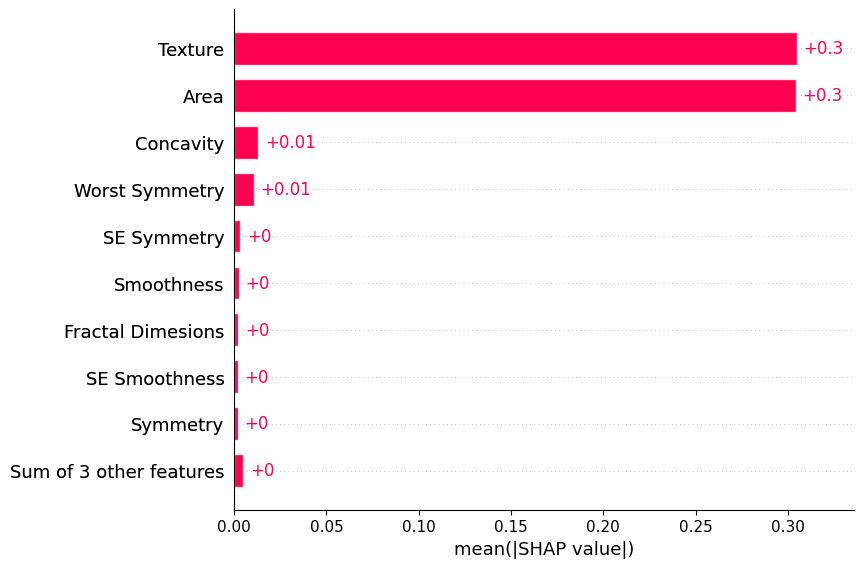

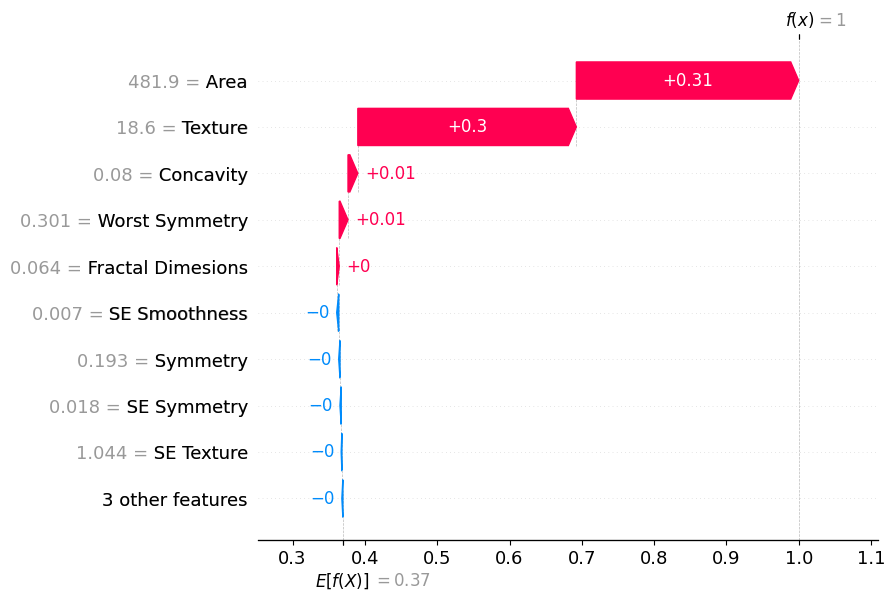

In [ ]:
# The kernel explainer recieves the function that predicts the probabilty of classes and the train set as its main inputs.
explainer = shap.KernelExplainer(model_svm.predict_proba, X_train_standardized)

# Computing the SHAP values using on the samples in the test set.
shap_values = explainer(X_test)

# get just the explanations for the positive class
shap_values = shap_values[..., 1]

# Bar plot: the mean absolute value of the SHAP values each feature to provide a global explanation of the model.
shap.plots.bar(shap_values)

#Waterfall plot
#Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.
sample_id = 0
shap.plots.waterfall(shap_values[sample_id])

# Epistoric Uncertainty

We will also analyze the epistemic uncertainty of our SVM model

In [ ]:
random_state = 42

# Bootstrapping
num_bootstrap = 100  # You can adjust the number of bootstrap samples

brier_scores_uncalibrated = []
brier_scores_calibrated = []

bootstrap_models = []

for _ in range(num_bootstrap):
    X_train_boot, _, y_train_boot, _ = train_test_split(X, y, test_size=0.4, random_state=np.random.randint(1, 1000))
    X_train_boot, X_val_boot, y_train_boot, y_val_boot = train_test_split(X_train_boot, y_train_boot, test_size=0.2, random_state=random_state)

    scaler_boot = StandardScaler()
    X_train_boot_standardized = scaler_boot.fit_transform(X_train_boot)
    X_val_boot_standardized = scaler_boot.transform(X_val_boot)

    model_svm_boot = SVC(C=0.1, kernel="linear", probability=True)
    model_svm_boot.fit(X_train_boot_standardized, y_train_boot)
    bootstrap_models.append(model_svm_boot)

    y_pred_svm_boot_prob = model_svm_boot.predict_proba(X_test_standardized)[:, 1]

    # Calibration
    model_svm_calibrated_boot = CalibratedClassifierCV(estimator=model_svm_boot, cv='prefit', method='isotonic')
    model_svm_calibrated_boot.fit(X_val_boot_standardized, y_val_boot)

    y_pred_svm_cal_boot_prob = model_svm_calibrated_boot.predict_proba(X_test_standardized)[:, 1]

    # Brier Scores
    brier_scores_uncalibrated.append(brier_score_loss(y_test, y_pred_svm_boot_prob, pos_label='M'))
    brier_scores_calibrated.append(brier_score_loss(y_test, y_pred_svm_cal_boot_prob, pos_label='M'))


In [ ]:
# Calculate mean and standard deviation of bootstrap brier scores
mean_brier_uncalibrated = np.mean(brier_scores_uncalibrated)
std_brier_uncalibrated = np.std(brier_scores_uncalibrated)

mean_brier_calibrated = np.mean(brier_scores_calibrated)
std_brier_calibrated = np.std(brier_scores_calibrated)

print("Mean Brier Score (Uncalibrated):", mean_brier_uncalibrated)
print("Standard Deviation Brier Score (Uncalibrated):", std_brier_uncalibrated)
print("Mean Brier Score (Calibrated):", mean_brier_calibrated)
print("Standard Deviation Brier Score (Calibrated):", std_brier_calibrated)

Mean Brier Score (Uncalibrated): 0.03009862623916555
Standard Deviation Brier Score (Uncalibrated): 0.002872783397328784
Mean Brier Score (Calibrated): 0.035776172684515724
Standard Deviation Brier Score (Calibrated): 0.006820749108323855


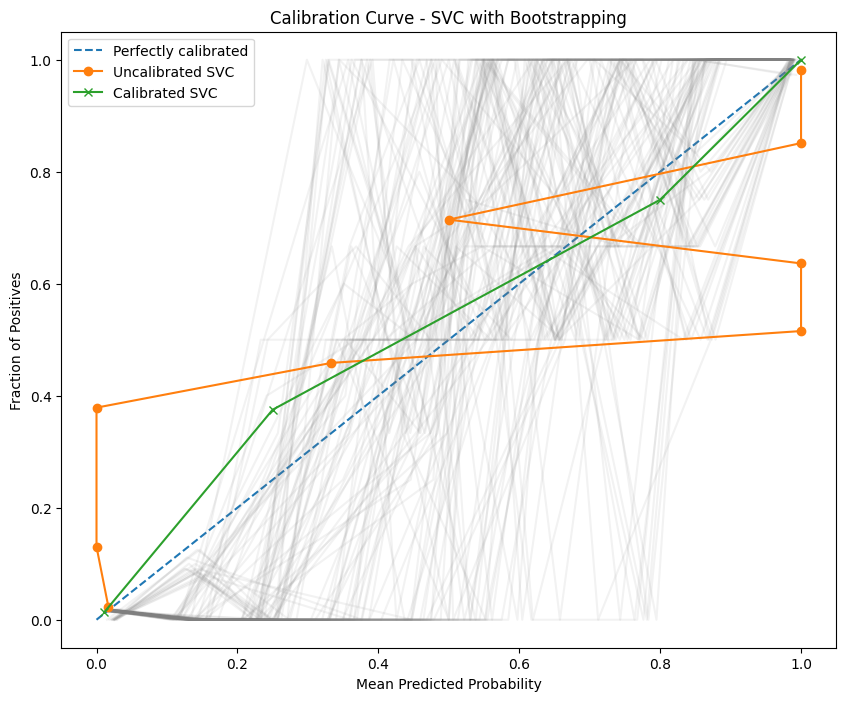

In [ ]:
# Plot Calibration Curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

# Calculate mean calibration curve
mean_predicted_value_svc, fraction_of_positives_svc = calibration_curve(
    y_test, np.mean(np.vstack([model.predict_proba(X_test_standardized)[:, 1] for model in bootstrap_models]), axis=0),
    n_bins=10, pos_label='M'
)

for i in range(num_bootstrap):
    y_pred_svm_boot_prob = bootstrap_models[i].predict_proba(X_test_standardized)[:, 1]
    fraction_of_positives_svc_boot, mean_predicted_value_svc_boot = calibration_curve(
        y_test, y_pred_svm_boot_prob, n_bins=10, pos_label='M'
    )
    plt.plot(
        mean_predicted_value_svc_boot, fraction_of_positives_svc_boot,
        color='gray', alpha=0.1
    )

plt.plot(mean_predicted_value_svc, fraction_of_positives_svc, marker='o', label='Uncalibrated SVC')
plt.plot(mean_predicted_value_svc_calibrated, fraction_of_positives_svc_calibrated, marker='x', label='Calibrated SVC')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve - SVC with Bootstrapping')
plt.legend()
plt.show()